In [1]:
import pandas as pd
import numpy as np
\
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import xgboost as xgb

import shap 
from sklearn.feature_selection import mutual_info_classif

In [2]:
df = pd.read_csv('C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned.csv')

In [3]:
df.describe()

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000,...,7564.000000,7564.000000,7564.000000,7564.00000,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000
mean,0.348889,0.056055,3.148599,0.196939,0.139386,0.461852,0.443891,0.269370,0.249939,0.369529,...,0.341089,1.387890,1.377578,0.84294,0.064781,178.600278,183.116803,168.358720,29.567292,29.956240
std,0.476650,0.230043,0.619761,0.339437,0.299075,0.113040,0.114772,0.237780,0.233366,0.615720,...,0.654119,1.837434,1.919910,1.46263,0.265784,9.006573,10.751850,36.048034,3.990415,4.214852
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,152.400000,147.320000,115.000000,18.000000,18.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.410000,0.388125,0.082310,0.077631,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,172.720000,177.800000,145.000000,27.000000,27.000000
50%,0.000000,0.000000,3.000000,0.023438,0.000000,0.460000,0.440000,0.228750,0.197500,0.125000,...,0.000000,1.000000,1.000000,0.00000,0.000000,177.800000,182.880000,170.000000,29.000000,30.000000
75%,1.000000,0.000000,3.000000,0.250000,0.125000,0.512201,0.495159,0.382148,0.330000,0.500000,...,1.000000,2.000000,2.000000,1.00000,0.000000,185.420000,190.500000,185.000000,32.000000,33.000000
max,1.000000,1.000000,5.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,8.000000,...,5.000000,11.000000,14.000000,16.00000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7554,7555,7556,7557,7558,7559,7560,7561,7562,7563
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weight_class_Open Stance.1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class_Orthodox.1,True,True,True,True,True,True,False,True,False,True,...,False,True,False,False,False,False,True,True,True,True
weight_class_Sideways.1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class_Southpaw.1,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,False,False,False,False


In [5]:
X = df.drop(columns=['Winner'])
y = df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


First we try with xgboost

In [6]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy}")

XGBoost Accuracy: 0.6434236615994713


In [7]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [8]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
Best Cross-Validation Accuracy: 0.6714423791460448


In [9]:
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)
best_xgb_accuracy = accuracy_score(y_test, y_pred_best_xgb)
print(f"XGBoost Accuracy with Best Parameters: {best_xgb_accuracy}")

XGBoost Accuracy with Best Parameters: 0.6622604097818903


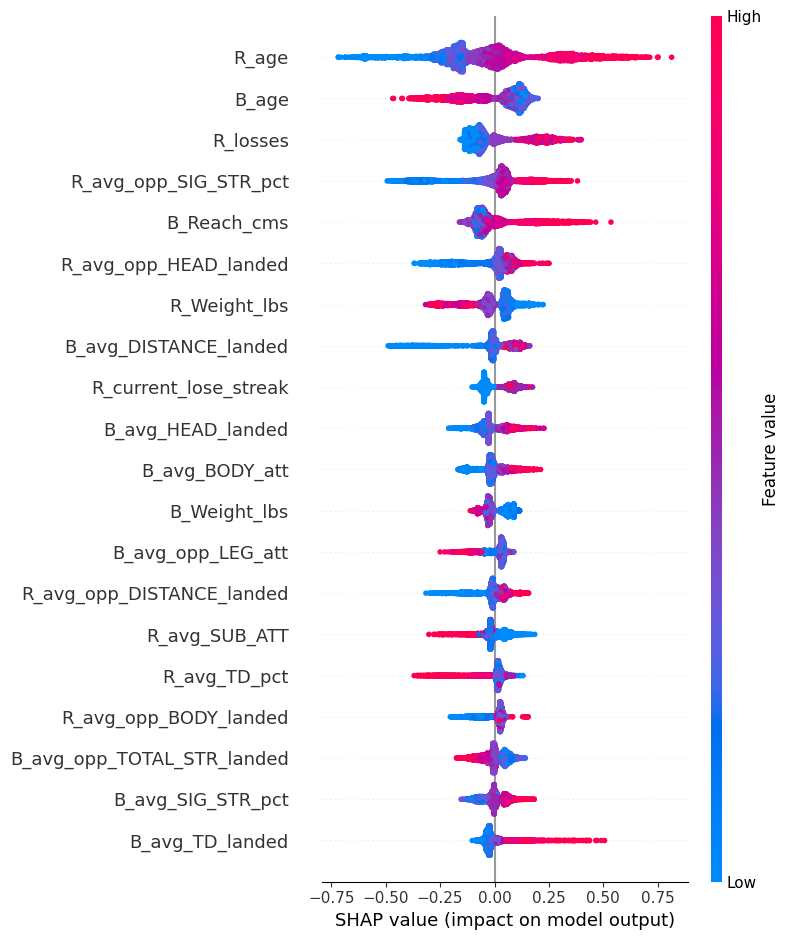

In [10]:
explainer_xgb = shap.Explainer(best_xgb_model)
shap_values_xgb = explainer_xgb(X_train)
shap.summary_plot(shap_values_xgb, X_train, feature_names=X.columns)


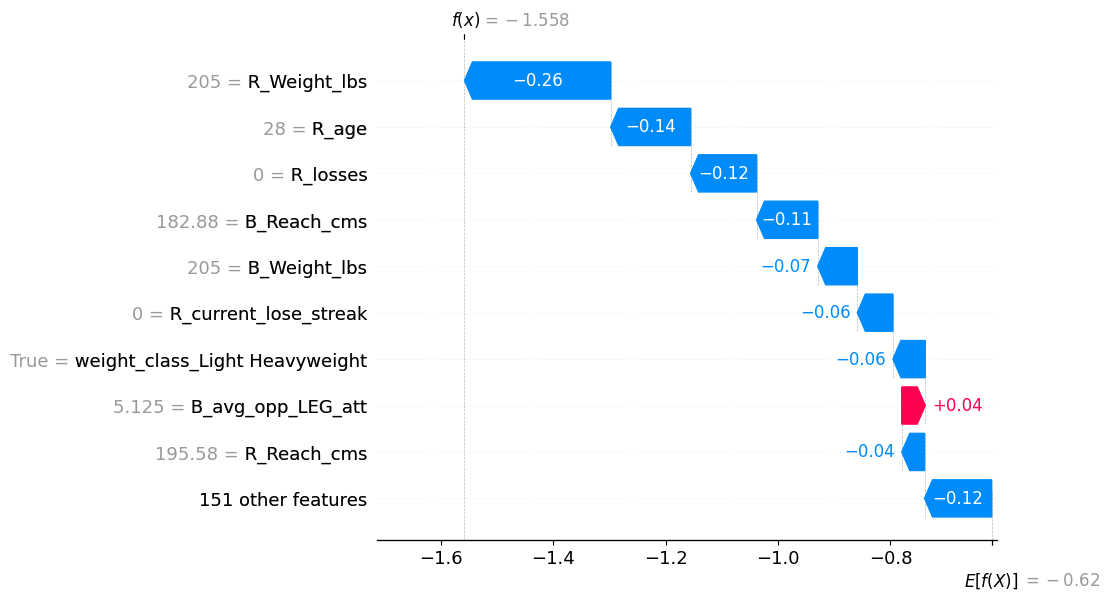

In [11]:
#waterfall plot for shap values

shap.plots.waterfall(shap_values_xgb[78])


In [12]:
#force plot for shap values

shap.plots.force(shap_values_xgb[0])

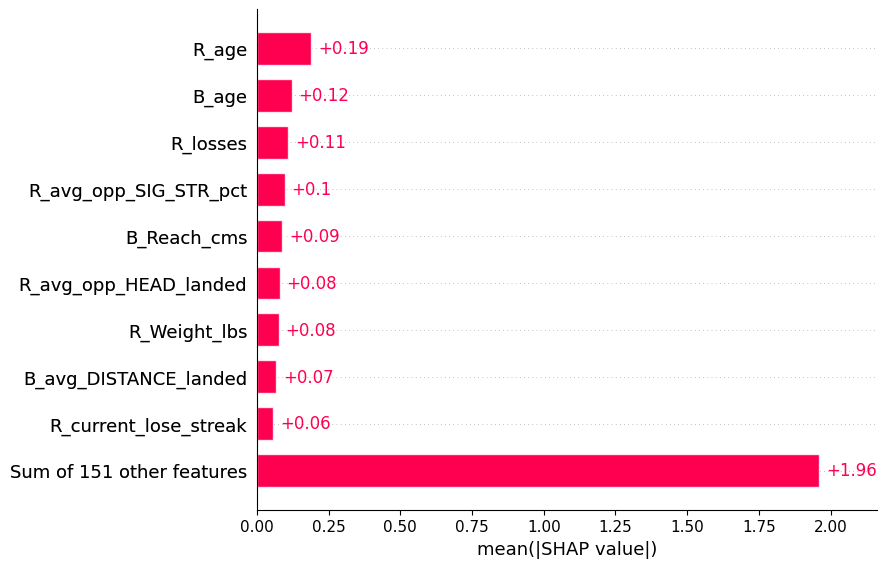

In [13]:
shap.plots.bar(shap_values_xgb)

In [14]:
shap_values_xgb

.values =
array([[ 0.0000000e+00,  7.5907251e-03, -2.7003004e-03, ...,
         0.0000000e+00,  5.2641341e-03,  0.0000000e+00],
       [ 0.0000000e+00,  8.0071008e-03,  1.7537270e-05, ...,
         0.0000000e+00,  5.2641341e-03,  0.0000000e+00],
       [ 0.0000000e+00,  8.2636420e-03,  7.7358005e-03, ...,
         0.0000000e+00,  2.3545818e-03,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  6.9306679e-03,  1.2708852e-03, ...,
         0.0000000e+00,  5.2641341e-03,  0.0000000e+00],
       [ 0.0000000e+00,  7.8642210e-03, -3.9935489e-03, ...,
         0.0000000e+00,  5.2641341e-03,  0.0000000e+00],
       [ 0.0000000e+00,  7.0973514e-03,  1.7537270e-05, ...,
         0.0000000e+00,  5.2641341e-03,  0.0000000e+00]], dtype=float32)

.base_values =
array([-0.61974543, -0.61974543, -0.61974543, ..., -0.61974543,
       -0.61974543, -0.61974543], dtype=float32)

.data =
array([[0, 3, 1.0, ..., False, False, False],
       [0, 3, 0.0, ..., False, False, False],
       [0, 3, 0.25, ...,

In [15]:
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)
print(mi_series)

R_avg_opp_SIG_STR_landed        0.024950
R_avg_opp_HEAD_att              0.024395
R_avg_SUB_ATT                   0.019902
B_avg_DISTANCE_att              0.019486
B_avg_SIG_STR_landed            0.019174
                                  ...   
B_avg_opp_TD_att                0.000000
R_win_by_TKO_Doctor_Stoppage    0.000000
B_age                           0.000000
B_avg_opp_REV                   0.000000
weight_class_Switch.1           0.000000
Length: 160, dtype: float64


In [16]:
mi_series.head(20)

R_avg_opp_SIG_STR_landed      0.024950
R_avg_opp_HEAD_att            0.024395
R_avg_SUB_ATT                 0.019902
B_avg_DISTANCE_att            0.019486
B_avg_SIG_STR_landed          0.019174
R_avg_opp_TOTAL_STR_att       0.017765
R_avg_opp_BODY_att            0.017576
B_avg_SIG_STR_att             0.017272
B_avg_opp_BODY_att            0.016754
R_avg_opp_TOTAL_STR_landed    0.016289
R_Weight_lbs                  0.016058
R_avg_opp_BODY_landed         0.015738
R_avg_opp_SIG_STR_pct         0.015414
R_avg_opp_DISTANCE_att        0.014975
R_avg_opp_HEAD_landed         0.014875
R_avg_BODY_att                0.014500
B_avg_TOTAL_STR_att           0.014476
B_avg_DISTANCE_landed         0.014422
R_age                         0.014342
B_avg_opp_DISTANCE_att        0.013932
dtype: float64

<Axes: >

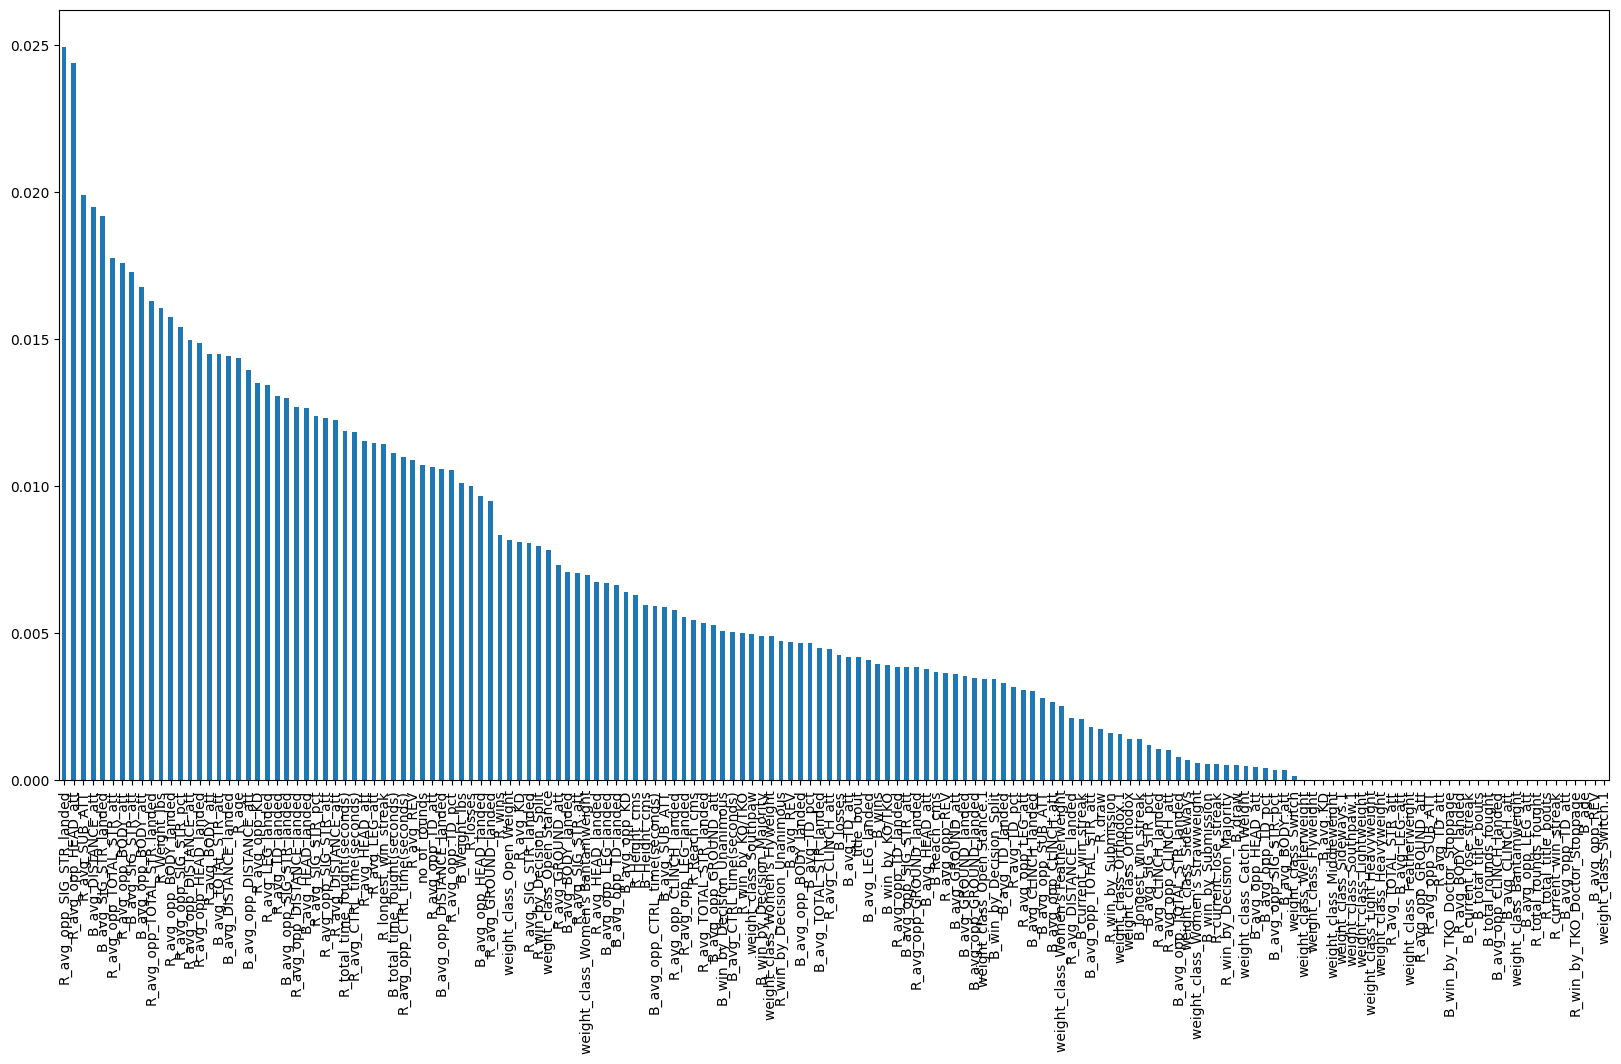

In [17]:
mi_series.plot.bar(figsize=(20, 10))
